# Feature Scaling Normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\AmiteshOP\Downloads\wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class_Label','Alcohol','Malic_acid']

In [5]:
df.head()

,class_Label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [13]:
df.shape

(178, 3)

In [7]:
df.describe()

,class_Label,Alcohol,Malic_acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


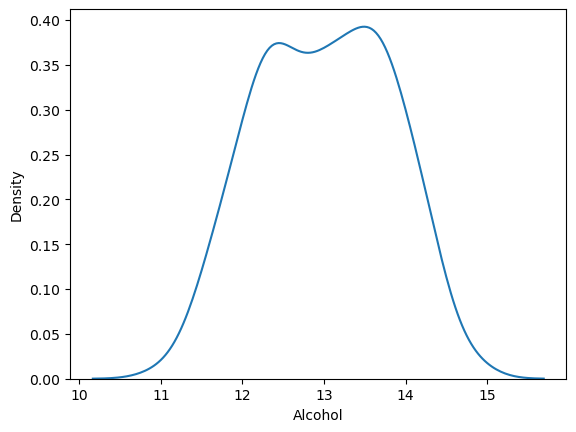

In [8]:
sns.kdeplot(df['Alcohol']);

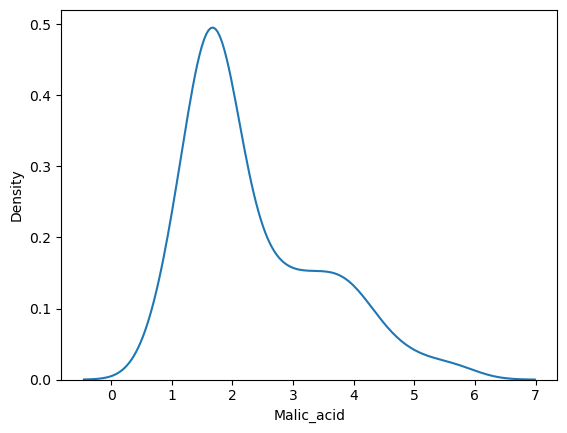

In [9]:
sns.kdeplot(df['Malic_acid']);

C:\Users\AmiteshOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


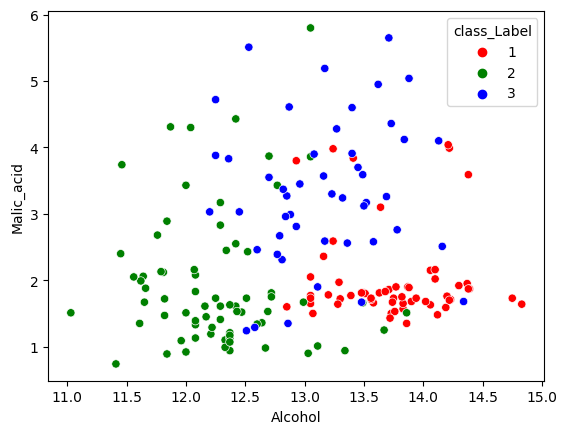

In [12]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic_acid'],hue=df['class_Label'],palette=color_dict);

# train test split

In [14]:
y=df['class_Label']
X=df.drop('class_Label',axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                     random_state=0)

In [19]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [20]:
# normalization MinMaxScale
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [22]:
# fit scale to the train set, it will learn the parameter
scale.fit(X_train)

# transform train test sets
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

In [24]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [34]:
np.round(X_train.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [33]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


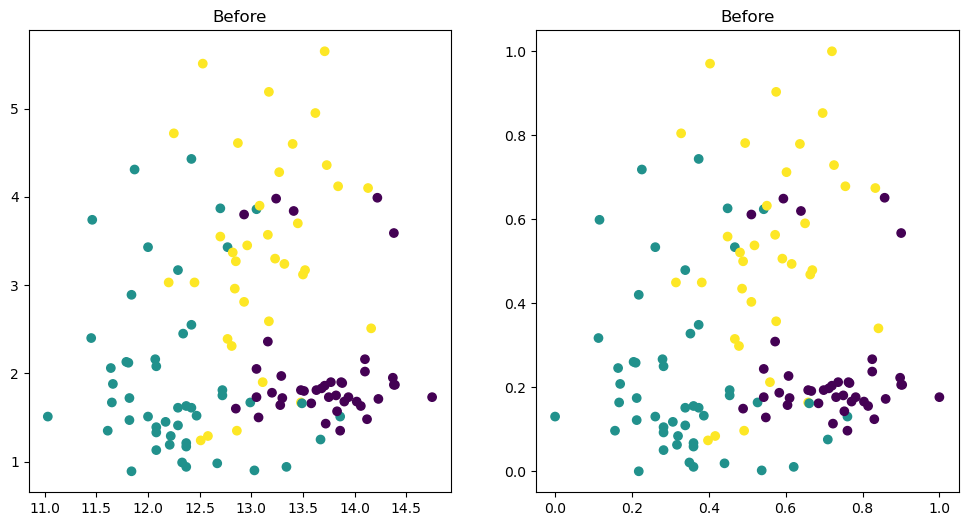

In [35]:
# graph
fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title('Before')
ax1.scatter(X_train['Alcohol'],X_train['Malic_acid'],c=y_train)

ax2.set_title('Before')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic_acid'],c=y_train);

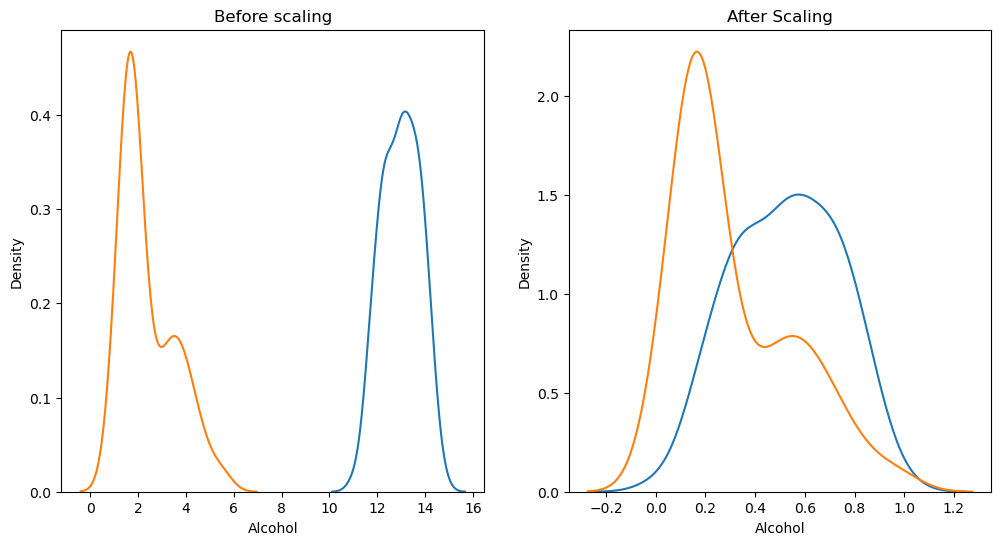

In [36]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,6))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic_acid'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic_acid'],ax=ax2);